### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [46]:
data = pd.read_csv('coupons.csv')

In [47]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


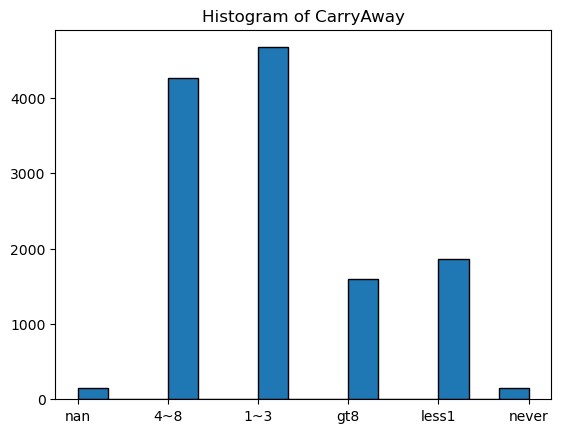

In [48]:
#find the missing data
missing_data_count1 = data.isnull().sum()
print(missing_data_count1)
#create histogram using the CarryAway column
data1 = data.astype(str)
plt.hist(data1['CarryAway'], edgecolor = 'black', bins = 15)
plt.title('Histogram of CarryAway')
plt.show()


3. Decide what to do about your missing data -- drop, replace, other...

In [49]:
missing_data_removed = data.replace(to_replace=[None, 'None', ''], value='NaN', inplace=False) 
missing_data_count2 = missing_data_removed.isnull().sum()
print(missing_data_count1)
print(missing_data_count2)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0

4. What proportion of the total observations chose to accept the coupon? 



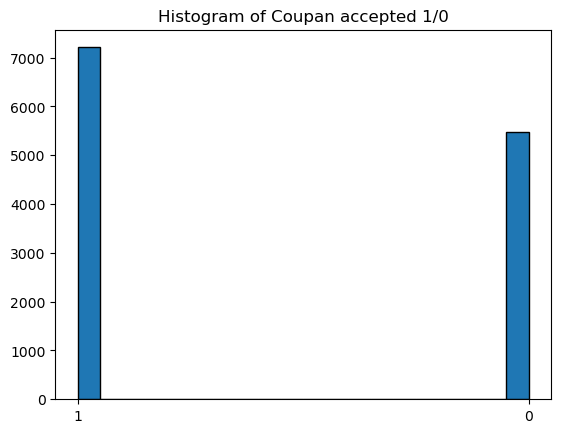

In [44]:
plt.hist(data1['Y'], edgecolor = 'black', bins =20)
plt.title('Histogram of Coupan accepted 1/0')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


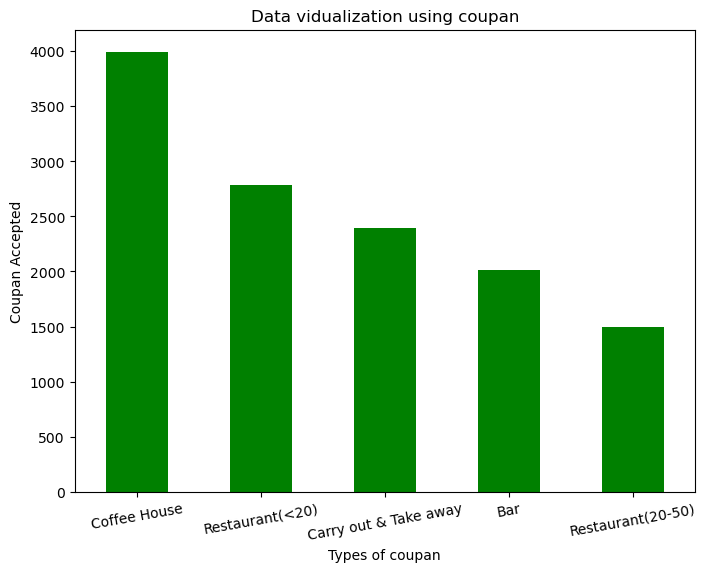

In [71]:
coupan_counts = data['coupon'].value_counts()
coupan_counts
print(coupan_counts)
plt.figure(figsize = (8,6))
coupan_counts.plot(kind='bar', color='green')
plt.title('Data vidualization using coupan')
plt.xlabel("Types of coupan")
plt.xticks(rotation=10)
plt.ylabel("Coupan Accepted")
plt.show()

6. Use a histogram to visualize the temperature column.

In [68]:
temp_counts = data['temperature'].value_counts()
temp_counts

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


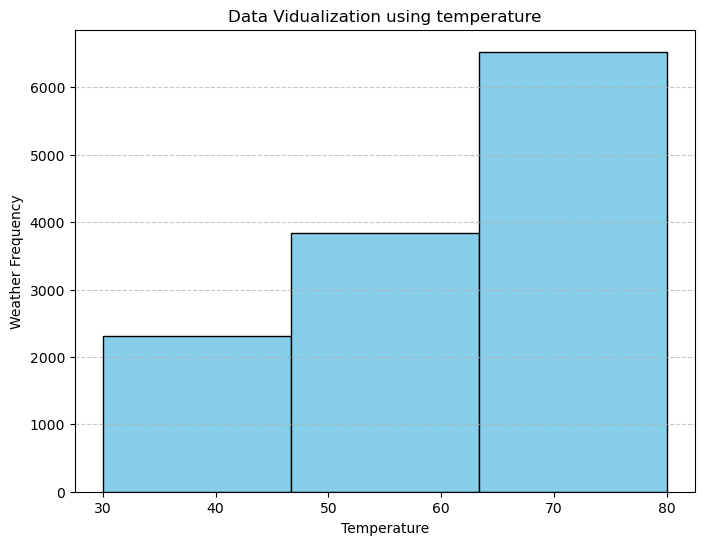

In [69]:
print(temp_counts)
plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=len(temp_counts), color='skyblue', edgecolor='black')
plt.title('Data Vidualization using temperature')
plt.xlabel('Temperature')
plt.ylabel('Weather Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [86]:
#create dataframe for bar coupans only
bar_df = pd.DataFrame(data[data['coupon']=='Bar'])
bar_df.head(40)
#print(bar_df)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [84]:
# Calculate the total number of 'Bar' coupons
total_bar_coupons = len(bar_df)
print(total_bar_coupons)
# Calculate the number of accepted 'Bar' coupons
accepted_bar_coupons = len(bar_df[bar_df['Y'] == 1])
print(accepted_bar_coupons)
# Calculate the proportion of accepted 'Bar' coupons
proportion_accepted_bar = accepted_bar_coupons / total_bar_coupons
print(proportion_accepted_bar)

2017
827
0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [97]:
bar_freqency = ['less1','1~3']
bar_df_less_than3 = data[(data['coupon'] == 'Bar') & (data['Bar'].isin(bar_freqency) )]
bar_df_less_than3.head(40)
acceptance_rate_by_frequency = bar_df_less_than3['Y'].mean()
print(acceptance_rate_by_frequency)

#geater than 
bar_freqency1 = ['4~8','gt8']
bar_df_more_than3 = data[(data['coupon'] == 'Bar') & (data['Bar'].isin(bar_freqency1) )]
bar_df_more_than3.head(40)
acceptance_rate_by_frequency1 = bar_df_more_than3['Y'].mean()
print(acceptance_rate_by_frequency1)



0.5274043433298863
0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [110]:
#drivers who go to a bar more than once a month and are over the age of 25
bar_freqency_over_more_than_once = ['4~8','gt8','1~3']
bar_freqency_over_age_25 =['31','26','36','41','46','50plus']
drivers_over_25 = data[(data['Bar'].isin(bar_freqency_over_more_than_once)) & (data['age'].isin(bar_freqency_over_age_25))]
print(drivers_over_25)
acceptance_rate_over_25 = drivers_over_25['Y'].mean()
print(acceptance_rate_over_25)

# Now below 25 and less than once visit to bar
driver_all_others = data[(data['Bar'].isin(bar_freqency_over_more_than_once)) & (~data['age'].isin(bar_freqency_over_age_25))]
print(driver_all_others)
acceptance_rate_all_other = driver_all_others['Y'].mean()
print(acceptance_rate_all_other)

#compare both 
differece = acceptance_rate_over_25 - acceptance_rate_all_other
print(differece)
# both are almost same, very minor difference like 0.2%

           destination  passanger weather  temperature  time  \
110    No Urgent Place      Alone   Sunny           55   2PM   
111    No Urgent Place  Friend(s)   Sunny           80  10AM   
112    No Urgent Place  Friend(s)   Sunny           80  10AM   
113    No Urgent Place  Friend(s)   Sunny           80  10AM   
114    No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12497             Home    Partner   Rainy           55   6PM   
12498             Work      Alone   Rainy           55   7AM   
12499             Work      Alone   Snowy           30   7AM   
12500             Work      Alone   Snowy           30   7AM   
12501             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
110          Restaurant(<20)         1d    Male  26  Unmarried partner  ...   
111             Coffee House         2h    Male  26  Unmarried partner  .

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [117]:
occupation = ['farming','fishing','forestry']
kid = 'Kid(s)'
bar_freqency_over_more_than_once1 = ['4~8','gt8','1~3']

driver_go_bars = data[(data['Bar'].isin(bar_freqency_over_more_than_once1)) & (data['passanger'] != kid) & ( ~data['occupation'].isin(occupation))]
print(driver_go_bars)
acceptance_rate_all = driver_go_bars['Y'].mean()
print(acceptance_rate_all)


           destination  passanger weather  temperature  time  \
88     No Urgent Place      Alone   Sunny           55   2PM   
89     No Urgent Place  Friend(s)   Sunny           80  10AM   
90     No Urgent Place  Friend(s)   Sunny           80  10AM   
91     No Urgent Place  Friend(s)   Sunny           80  10AM   
92     No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12541             Work      Alone   Rainy           55   7AM   
12542             Work      Alone   Snowy           30   7AM   
12543             Work      Alone   Snowy           30   7AM   
12544             Work      Alone   Snowy           30   7AM   
12545             Work      Alone   Sunny           80   7AM   

                      coupon expiration gender age      maritalStatus  ...  \
88           Restaurant(<20)         1d   Male  21             Single  ...   
89              Coffee House         2h   Male  21             Single  ... 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



           destination  passanger weather  temperature  time  \
89     No Urgent Place  Friend(s)   Sunny           80  10AM   
90     No Urgent Place  Friend(s)   Sunny           80  10AM   
91     No Urgent Place  Friend(s)   Sunny           80  10AM   
92     No Urgent Place  Friend(s)   Sunny           80   2PM   
93     No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12524  No Urgent Place  Friend(s)   Sunny           80   6PM   
12525  No Urgent Place  Friend(s)   Sunny           80  10PM   
12526  No Urgent Place  Friend(s)   Sunny           55  10PM   
12527  No Urgent Place  Friend(s)   Sunny           30  10AM   
12528  No Urgent Place  Friend(s)   Snowy           30   2PM   

                      coupon expiration gender age      maritalStatus  ...  \
89              Coffee House         2h   Male  21             Single  ...   
90                       Bar         1d   Male  21             Single  ... 

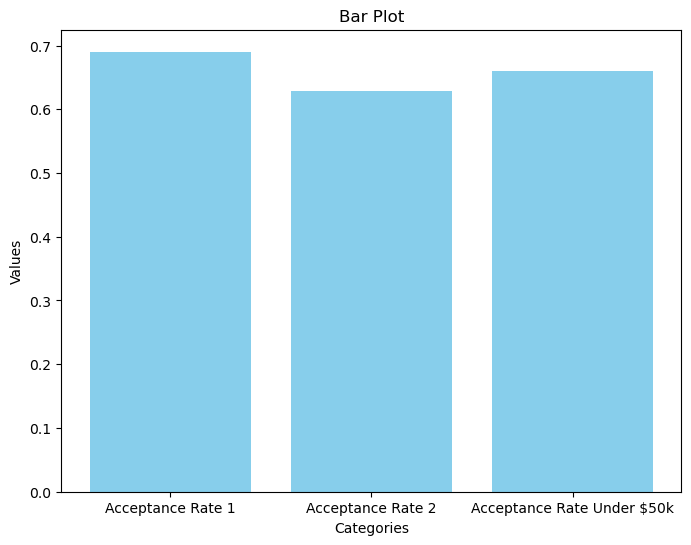

In [140]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
bar_freqency_over_more_than_once2 = ['4~8','gt8','1~3']

drivers_more_than_once_no_kid_widowed = data[(data['Bar'].isin(bar_freqency_over_more_than_once2)) & (data['passanger'] != kid) & (data['passanger'] != 'Alone' )]
print(drivers_more_than_once_no_kid_widowed)
acceptance_rates1 = drivers_more_than_once_no_kid_widowed['Y'].mean()

#go to bars more than once a month and are under the age of 30 OR
bar_freqency_below_age_30 =['21','26','below21']
drivers_more_than_once_below_age_30 = data[(data['Bar'].isin(bar_freqency_over_more_than_once2)) &(data['age'].isin(bar_freqency_below_age_30)) ]
acceptance_rates2 = drivers_more_than_once_below_age_30['Y'].mean()


#go to cheap restaurants more than 4 times a month and income is less than 50K.
income_less_than_50k = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']
bar_freqency_over_more_than_4times = ['4~8','gt8']
driver_visit_more_than_4times_with_less_50k = data[(data['Bar'].isin(bar_freqency_over_more_than_4times)) & (data['income'].isin(income_less_than_50k))& (data['RestaurantLessThan20'].isin(bar_freqency_over_more_than_4times))]
acceptance_rates_under_50k = driver_visit_more_than_4times_with_less_50k['Y'].mean()

print(acceptance_rates1)
print(acceptance_rates2)
print(acceptance_rates_under_50k)

categories = ['Acceptance Rate 1', 'Acceptance Rate 2', 'Acceptance Rate Under $50k']

# Values for the bar plot
values = [acceptance_rates1, acceptance_rates2, acceptance_rates_under_50k]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Hypothesis 1 : The drivers who received bar coupons and accepted them, visiting the bar more than once a month, neither have kids nor are widowed. 
#Hypothesis 2:  Drivers below the age of 30 are also visiting bars, but their frequency is not as high as drivers who have either partners or friends. 
#Hypothesis 3: I also noticed that the frequency increases to the cheapest restaurants for those with incomes less than $50k. They tend to visit frequently as they also accept the coupons at a high rate.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [146]:
#What proportion Coffee House coupons were accepted

#create dataframe for bar coupans only
coffee_house_df = pd.DataFrame(data[data['coupon']=='Coffee House'])
coffee_house_df.head(40)

# Calculate the total number of 'Coffee House' coupons
total_coffee_house_coupons = len(coffee_house_df)
print(total_coffee_house_coupons)
# Calculate the number of accepted 'Bar' coupons
accepted_coffee_house_coupons = len(coffee_house_df[coffee_house_df['Y'] == 1])
print(accepted_coffee_house_coupons)
# Calculate the proportion of accepted 'Bar' coupons
proportion_accepted_coffee_house = accepted_coffee_house_coupons / total_coffee_house_coupons
print(proportion_accepted_coffee_house)

3996
1995
0.49924924924924924


In [152]:
#using coffee house 
coffee_house = data[(data['coupon'] == 'Coffee House')]
print(coffee_house)
acceptance_rates_coffee_house = coffee_house['Y'].mean()
print(acceptance_rates_coffee_house)

           destination  passanger weather  temperature  time        coupon  \
1      No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
3      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
12     No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
15                Home      Alone   Sunny           80   6PM  Coffee House   
...                ...        ...     ...          ...   ...           ...   
12656             Home      Alone   Snowy           30  10PM  Coffee House   
12659             Work      Alone   Snowy           30   7AM  Coffee House   
12674             Home      Alone   Rainy           55  10PM  Coffee House   
12675             Home      Alone   Snowy           30  10PM  Coffee House   
12681             Work      Alone   Snowy           30   7AM  Coffee House   

      expiration  gender age      maritalStatus  ...  CoffeeHou

           destination  passanger weather  temperature  time        coupon  \
45     No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
48     No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
49     No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
50     No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
52     No Urgent Place  Friend(s)   Sunny           80   6PM  Coffee House   
...                ...        ...     ...          ...   ...           ...   
12273             Home      Alone   Snowy           30  10PM  Coffee House   
12279             Work      Alone   Snowy           30   7AM  Coffee House   
12359             Home      Alone   Rainy           55  10PM  Coffee House   
12360             Home      Alone   Snowy           30  10PM  Coffee House   
12366             Work      Alone   Snowy           30   7AM  Coffee House   

      expiration  gender age maritalStatus  ...  CoffeeHouse Ca

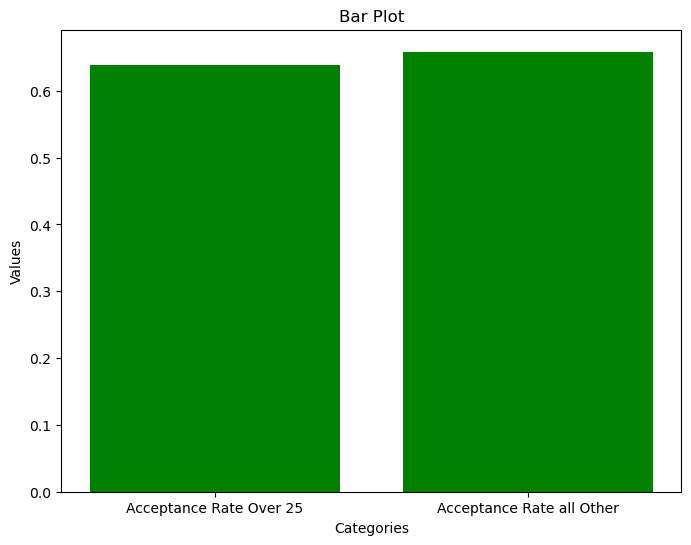

In [162]:
#drivers who go to a bar more than once a month and are over the age of 25
coffee_house_freqency_over_more_than_once = ['4~8','gt8','1~3']
coffee_house_freqency_over_age_25 =['31','26','36','41','46','50plus']
#coffee_house = data[(data['coupon'] == 'Coffee House')]
drivers_over_25 = coffee_house[(coffee_house['CoffeeHouse'].isin(coffee_house_freqency_over_more_than_once)) & (coffee_house['age'].isin(coffee_house_freqency_over_age_25))]
print(drivers_over_25)
acceptance_rate_over_25 = drivers_over_25['Y'].mean()


# Now below 25 and less than once visit to bar
driver_all_others = data[(data['CoffeeHouse'].isin(coffee_house_freqency_over_more_than_once)) & (~data['age'].isin(coffee_house_freqency_over_age_25))]
print(driver_all_others)
acceptance_rate_all_other = driver_all_others['Y'].mean()

#compare both 
differece1 =   acceptance_rate_all_other - acceptance_rate_over_25
print(acceptance_rate_over_25)
print(acceptance_rate_all_other)
print(differece1)
# both are almost same, very minor difference like 0.02

categories = ['Acceptance Rate Over 25', 'Acceptance Rate all Other']

# Values for the bar plot
values = [acceptance_rate_over_25, acceptance_rate_all_other]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='green')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


In [163]:
#Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
occupation = ['farming','fishing','forestry']
kid = 'Kid(s)'
coffe_house_freqency_over_more_than_once1 = ['4~8','gt8','1~3']

driver_go_coffee_house = data[(data['CoffeeHouse'].isin(bar_freqency_over_more_than_once1)) & (data['passanger'] != kid) & ( ~data['occupation'].isin(occupation))]
print(driver_go_coffee_house)
acceptance_rate_coffee_house = driver_go_coffee_house['Y'].mean()
print(acceptance_rate_coffee_house)



           destination  passanger weather  temperature  time  \
44     No Urgent Place      Alone   Sunny           55   2PM   
45     No Urgent Place  Friend(s)   Sunny           80  10AM   
46     No Urgent Place  Friend(s)   Sunny           80  10AM   
47     No Urgent Place  Friend(s)   Sunny           80  10AM   
48     No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12629             Home    Partner   Rainy           55   6PM   
12630             Work      Alone   Rainy           55   7AM   
12631             Work      Alone   Snowy           30   7AM   
12632             Work      Alone   Snowy           30   7AM   
12633             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
44           Restaurant(<20)         1d    Male  46             Single  ...   
45              Coffee House         2h    Male  46             Single  .

           destination  passanger weather  temperature  time  \
44     No Urgent Place      Alone   Sunny           55   2PM   
45     No Urgent Place  Friend(s)   Sunny           80  10AM   
46     No Urgent Place  Friend(s)   Sunny           80  10AM   
47     No Urgent Place  Friend(s)   Sunny           80  10AM   
48     No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12629             Home    Partner   Rainy           55   6PM   
12630             Work      Alone   Rainy           55   7AM   
12631             Work      Alone   Snowy           30   7AM   
12632             Work      Alone   Snowy           30   7AM   
12633             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
44           Restaurant(<20)         1d    Male  46             Single  ...   
45              Coffee House         2h    Male  46             Single  .

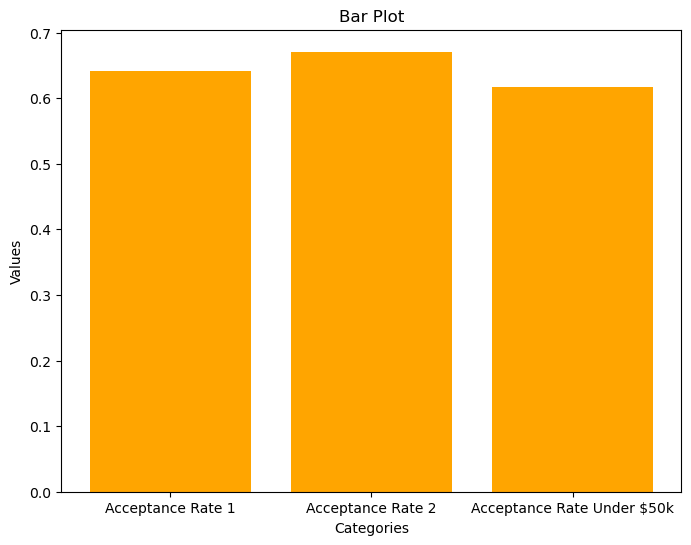

In [167]:
#go to bars more than once a month, had passengers that were not a kid
coffee_house_freqency_over_more_than_once2 = ['4~8','gt8','1~3']

drivers_more_than_once_no_kid_widowed = data[(data['CoffeeHouse'].isin(coffee_house_freqency_over_more_than_once2)) & (data['passanger'] != kid)]
print(drivers_more_than_once_no_kid_widowed)
acceptance_rates1 = drivers_more_than_once_no_kid_widowed['Y'].mean()

#go to bars more than once a month and are under the age of 30 OR
coffee_house_freqency_below_age_30 =['21','26','below21']
drivers_more_than_once_below_age_30 = data[(data['CoffeeHouse'].isin(coffee_house_freqency_over_more_than_once2)) &(data['age'].isin(coffee_house_freqency_below_age_30)) ]
acceptance_rates2 = drivers_more_than_once_below_age_30['Y'].mean()


#go to cheap restaurants more than 4 times a month and income is less than 50K.
income_less_than_50k = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']
coffee_house_freqency_over_more_than_4times = ['4~8','gt8']
driver_visit_more_than_4times_with_less_50k = data[(data['CoffeeHouse'].isin(coffee_house_freqency_over_more_than_4times)) & (data['income'].isin(income_less_than_50k))& (data['RestaurantLessThan20'].isin(coffee_house_freqency_over_more_than_4times))]
acceptance_rates_under_50k = driver_visit_more_than_4times_with_less_50k['Y'].mean()

print(acceptance_rates1)
print(acceptance_rates2)
print(acceptance_rates_under_50k)

categories = ['Acceptance Rate 1', 'Acceptance Rate 2', 'Acceptance Rate Under $50k']

# Values for the bar plot
values = [acceptance_rates1, acceptance_rates2, acceptance_rates_under_50k]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='orange')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

In [ ]:
#findings:
#Hypothesis 1 : The drivers who received coffee house coupons and accepted them, visiting the bar more than once a month, have no kids 
#Hypothesis 2:  Drivers below the age of 30 are also visiting bars, but their frequency is not as high as drivers who have either partners or friends. 
#Hypothesis 3: I also noticed that the frequency increases to the cheapest restaurants for those with incomes less than $50k. The trend shows that people whoo earn less than 50k tend to visit less frequent than other two groups which have no kids and below age 30.


